# Lab Session #1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> 
César Zapata - 02213600
<br>
<font color=blue>Academic Year:</font> 2022-2023

### General Introduction
In all the practical sessions of this course we will use python 3 and jupyter notebooks. Install Anaconda on your computer and open jupyter notebook by typing "jupyter notebook" or "jupyter lab" in the command line. Your browser will open a file explorer, from where you can navigate to the exercise.

The lab sessions consist of a jupyter notebook in which the different steps are described and explained, together with the tasks you are asked to complete.

You will form groups of two and submit one report per group. Reports should be formatted according to the guiding document. Make sure your answers stand out in the final submitted document!

Deadline: 2 weeks after lecture. Reports submitted after the deadline will not be graded.

### Context and Goals
This lab session is focused on the Hodgkin-Huxley (HH) model, following and reproducing the theoretical chapter that can be found here: https://neuronaldynamics.epfl.ch/online/Ch2.S2.html. You will be asked to complete code scripts, make observations and explain the results of the different simulations, and contextualise the analyses with the HH model theoretical background.


# Questions
## Part 1: Hodgkin-Huxley model equations
### Q1.1 HH equations <a id="Q1.1"/>
We are coding the HH equations by a single or by multiple functions, to reproduce the behaviour of a human pyramidal neuron when excited. This will be the function to be made to perform the HH model is the following: 

`
m, h, n, V, INa, IK, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h = HH_model(T, I_input, dt)
`

The inputs are:
1. `T` -> Time window of simulation [ms]
2. `I_input` -> input current [µA]
3. `dt` -> the rate of update [ms]

The outputs are: 
1. `V` -> the voltage of neuron [mV]
2. `m` -> activation variable for Na-current [u/cm^2]
3. `h` -> inactivation variable for Na-current [u/cm^2]
4. `n` -> activation variable for K-current [u/cm^2]
5. `t` -> the time axis of the simulation (useful for plotting) [ms]
6. `I_Na` -> Na current [µA/cm^2]
7. `I_K` -> K current [µA/cm^2]
8. `alpha_m, beta_m, alpha_n, beta_n, alpha_h, beta_h` -> gating parameters [1/ms]

You can use the functions that are already provided to retrieve some parameters. To complete the code, you can find the equations and parameter values in https://neuronaldynamics.epfl.ch/online/Ch2.S2.html.

Q1.1a Implement the update equations of the gating variables m, n and h as described in Table 2.1 of the online version of the book and reproduce Figure 2.3.

Q1.1b Make the plots and describe in your own words what you have plotted.

Q1.1c Unfortunately, when simulating the HH model with these parameters, you will not get a K-current. Please adjust (u-25) by (u+25) in the update equations for gating variable $n$.

* [Import these modules](#P1_imports)

* [Fill in answers here](#A1.1)

### Q1.2 Simulate the response to an impulse current <a id="Q1.2"/>
To try out whether the designed functions work, design a step function (A1.2a) that can be used to model the current input (A1.2b). Consider the following design parameters:

1. `I_input function` -> step function 
2. `T` -> time of simulation: 100 ms
3. `dt` -> update time: 0.01 ms
4. Current impulse `I_input`: 20 µA between 1 and 2 ms.

* [Fill in answers here](#A1.2)

### Q1.3. Plot V(t) <a id="Q1.3"/>
Plot the first 20 ms of $V(t)$.

Describe the dynamics of the neural voltage $V$.
Does it make sense?

* [Fill in answers here](#A1.3)

### Q1.4 Plot the model parameters <a id="Q1.4"/>
Plot the model parameters n, m and h in function of t and again limit the plots to the first 20 ms. Describe the dynamics of the model parameters m, n, and h. Does it make sense? Describe how the gates swing open and closed during the dynamics of a spike.
* [Fill in answers here](#A1.4)

### Q1.5. Plot I_Na and I_K <a id="Q1.5"/>
Plot I_Na and I_K in function of t (again only the first 20 ms).

Describe the dynamics of the currents. Does it make sense? Describe the currents flows during a spike.

* [Fill in answers here](#A1.5)

### Q1.6. Plot the conductances g_Na and g_K <a id="Q1.6"/>
Plot the conductances g_Na, g_K in function of t (again only the first 20 ms).

How are the conductances evolving during a spike?

* [Fill in answers here](#A1.6)

## Part 2: Package BRIAN

In the second part of the practical, you are going to use the Brian library to simulate the dynamics of a squid neuron when excited. To learn more about this module, read this paper: https://pubmed.ncbi.nlm.nih.gov/19115011/ . 
Before starting, the Brian module must be installed, together with the neurodynex3 module. Open the anaconda prompt, and install the brian2 package:

`conda install -c conda-forge brian2`

and then the neurodynex3 package:

`pip install neurodynex3`

### Note
If you are working on Linux or one of the newest mac OS systems, you might check whether your pip command is actually pip3.  

After installing, the packages are ready to use! If you need more information about the modules, you can find it here https://briansimulator.org/.

* [Import these modules](#P2_imports)

### Q2.1 Step current response <a id="Q2.1"/>
We study the response of a Hodgkin-Huxley squid neuron to different input currents. 

Have a look at the documentation of the functions `HH.simulate_HH_neuron()` and `HH.plot_data()` and the module `neurodynex3.tools.input_factory`.

By using the mentioned functions, code the following steps: 
1. Step function for the input current 
2. Run the HH simulation (for 300ms)
3. Plot the results of this simulation 

Vary the amplitude of the input current between 0.1 and 50 µA between 50 and 250ms.
Describe the different dynamics of the spiking neuron. 

What is the lowest step current amplitude to generate a spike or to generate repetitive firing?
Discuss the difference between the two regimes.

* [Fill in answer here](#A2.1)

### Q2.2 Slow and fast ramp current
The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q of the current, but on the “shape” of the current. Let’s investigate why.

#### Q2.2.1 Slow ramp current <a id="Q2.2.1"/>
Inject a slow ramp current into a HH neuron. The current is 0 µA at t = 0 and starts at 5 ms, linearly increasing to an amplitude of 14.0 µA at t = t_ramp_end. At t > t_ramp_end, the current is set back to 0 µA. 
A slow ramp duration could be between 30-100 ms.

Experiment with different t_ramp_end values to discover the maximal duration of a ramp, such that the neuron does not spike. Make sure you simulate for at least 20ms after t_ramp_end.

Q2.2.1a Use the function `HH.plot_data()` to visualize the dynamics of the system.

Q2.2.1b What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?

* [Fill in answers here](#A2.2.1)

#### Q2.2.2 Fast ramp current <a id="Q2.2.2"/>
Q2.2.2a Do the same as before but this time for a fast ramp current. Start the linearly increasing input current again at t = 5 ms. The amplitude at t = t_ramp_end is 5.0 µA. Start with a duration of 5 ms and then increase the ramp duration it until no spike occurs.
Use the function `HH.plot_data()` to visualize the dynamics of the system.

Q2.2.2b What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?

* [Fill in answers here](#A2.2.2)

#### Q2.2.3. Differences <a id="Q2.2.3"/>
Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m, n and h.

Hint: have a look at Chapter 2, Figure 2.3.

* [Fill in answers here](#A2.2.3)

### Q2.3 Rebound Spike <a id="Q2.3"/>
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

Inject a hyperpolarizing step current I_input = -1 µA for a duration of 25 ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_input = -5 µA. What is happening here? To which gating variable do you attribute this rebound spike?

It may be difficult to to see which gating parameter is responsible for depolarisation (and a possible consequent rebound spike) after a negative current injection. Therefore, also plot the real ratio of n and m, together with the effect of h and use this plot to answer the above question.

* [Fill in answers here](#A2.3)

# Answers

## Part 1: Hodgkin-Huxley model equations

### Imports <a id="P1_imports"/>

In [1]:
# Import and add all the libraries you need throughout the code

import math
import numpy as np
import matplotlib.pyplot as plt

# Make your graphs colorblind-friendly
plt.style.use('tableau-colorblind10')

### A1.1: HH Equations <a id="A1.1"/>
* [Go back to Q1.1](#Q1.1) 

In [6]:
# A1.1a Enter your code at the bottom of this cell
# Hints:
# Reversal potentials have unit mV
# Constant conductances have unit mS/cm2
    
# Hint: complete the following functions:

def gating_variable_n(u):
    if (1 - math.e ** (-(u-25) / 9)) == 0 or (1 - math.e ** ( (u-25) / 9)) == 0: # in case there is a division by zero
        return 0, 0
                                             
    alpha_n = (0.02 * (u-25)) / (1 - math.e ** (-(u-25) / 9) )
    beta_n = (-0.002 * (u-25)) / (1 - math.e ** ( (u-25) / 9) )
    
    return alpha_n, beta_n


def gating_variable_m(u):
    if (1 - math.e ** (-(u+35) / 9)) == 0 or (1 - math.e ** ( (u+35) / 9)) == 0: # in case there is a division by zero
        return 0, 0
                                             
    alpha_m = (0.182 * (u+35)) / (1 - math.e ** (-(u+35) / 9) )
    beta_m = (-0.124 * (u+35)) / (1 - math.e ** ( (u+35) / 9) )
    
    return alpha_m, beta_m


def gating_variable_h(u):
    if (math.e ** ((u+90) / 12)) == 0: # in case there is a division by zero
        return 0, 0       
                                   
    alpha_h = 0.25 * (math.e ** (-(u+90) / 12) )
    beta_h = 0.25 * (math.e ** ((u+62) / 6)) / ((math.e ** ((u+90) / 12)) )
    
    return alpha_h, beta_h


def HH_model(T, I_input, dt):
    
    u_rest = -65 #(mV) -> membrane resting potential
    t = np.arange(0, T, dt)  # time axis of the simulation
    
    # Table 2.1 in the document. Parameters for conductance and reverse potentials
    g_Na = 40 #(mS/cm2)
    E_Na = 55 #(mV)    
    g_K = 35 #(mS/cm2)
    E_K = -77 #(mV)
    g_L = 0.3 #(mS/cm2)
    E_L = -65 #(mV)
    C_m = 1 #(uF/cm2)


    # Defining initial conditions
    V = np.zeros(len(t)+1) # membrane potential vector (mV)
    I_Na = np.zeros(len(t)+1)
    I_K = np.zeros(len(t)+1)
    I_L = np.zeros(len(t)+1)
    m = np.zeros(len(t)+1) 
    h = np.zeros(len(t)+1) 
    n = np.zeros(len(t)+1) 
    alpha_m = np.zeros(len(t)+1)
    alpha_n = np.zeros(len(t)+1)
    alpha_h = np.zeros(len(t)+1)
    beta_m = np.zeros(len(t)+1)
    beta_n = np.zeros(len(t)+1)
    beta_h = np.zeros(len(t)+1)
    
    V[0] = u_rest 
    alpha_m[0], beta_m[0] = gating_variable_m(V[0]) 
    alpha_n[0], beta_n[0] = gating_variable_n(V[0])
    alpha_h[0], beta_h[0] = gating_variable_h(V[0])
    
    Tau_m = np.zeros(len(t)+1)
    Tau_n = np.zeros(len(t)+1)
    Tau_h =np.zeros(len(t)+1)

    # initial values
    m[0] = (alpha_m[0]) / (alpha_m[0] + beta_m[0])
    n[0] = (alpha_n[0]) / (alpha_n[0] + beta_n[0])
    h[0] = (alpha_h[0]) / (alpha_h[0] + beta_h[0])
    Tau_m[0] = 1 / (alpha_m[0] + beta_m[0]) 
    Tau_n[0] = 1 / (alpha_n[0] + beta_n[0]) 
    Tau_h[0] = 1 / (alpha_h[0] + beta_h[0]) 


    # function to get the ion currents
    def Ic(v, m, n, h): 
        I_Na = g_Na * (m**3) * h * (v-E_Na)
        I_K = g_K * (n**4) * (v - E_K)
        I_L = g_L * (v-E_L)
        
        return  I_Na, I_K, I_L  

    
    # Simulating
    for i in range(int(T/dt)):
    
        # updating gating variables
        alpha_m[i], beta_m[i] = gating_variable_m(V[i])
        alpha_n[i], beta_n[i] = gating_variable_n(V[i])
        alpha_h[i], beta_h[i] = gating_variable_h(V[i])

        Tau_m[i] = 1 / (alpha_m[i] + beta_m[i]) 
        Tau_n[i] = 1 / (alpha_n[i] + beta_n[i]) 
        Tau_h[i] = 1 / (alpha_h[i] + beta_h[i]) 
           
        m[i+1] = m[i] + dt * (alpha_m[i] * (1 - m[i]) - beta_m[i] * m[i])   
        h[i+1] = h[i] + dt * (alpha_h[i] * (1 - h[i]) - beta_h[i] * h[i])
        n[i+1] = n[i] + dt * (alpha_n[i] * (1 - n[i]) - beta_n[i] * n[i])
        
        I_Na[i], I_K[i], I_L[i] = Ic(V[i], m[i], n[i], h[i])    
        V[i+1] = ( (dt * (I_input[i] - I_Na[i] - I_K[i] - I_L[i]) + V[i]) ) / C_m
    

    return m, h, n, V, t, I_Na, I_K, I_L, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h, Tau_n, Tau_m, Tau_h


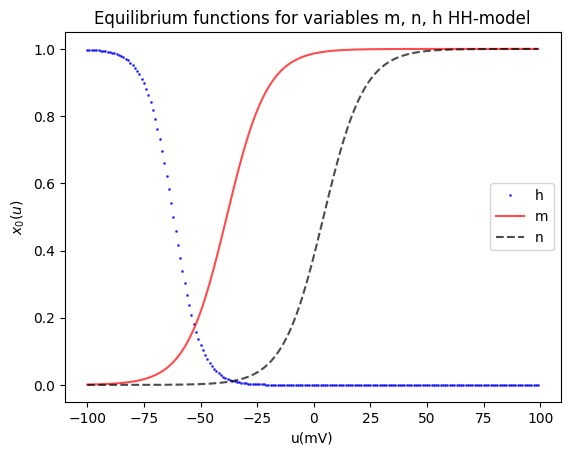

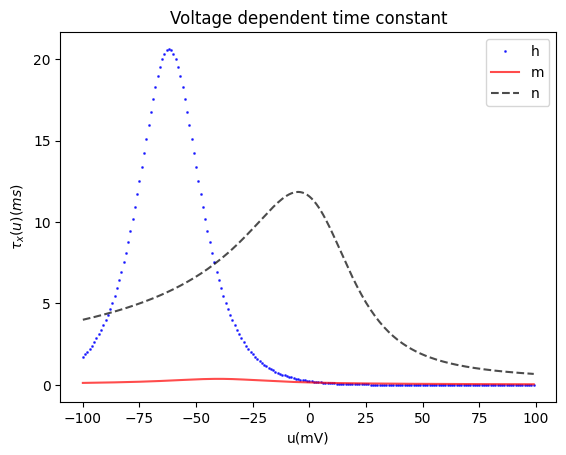

In [5]:
# A1.1b Plot your graph below

# Hint: the first graph plots rate constants (n, m and h in function of membrane voltage)
# Hint: the second graph plots the voltage dependent time constants (tau_n, tau_m and tau_h in function of membrane voltage)

v_arr = list(range(-100,100,1))

n = np.zeros(len(v_arr))
m = np.zeros(len(v_arr))
h = np.zeros(len(v_arr))

tau_n = np.zeros(len(v_arr))
tau_m = np.zeros(len(v_arr))
tau_h = np.zeros(len(v_arr))

for i in range(len(v_arr)):
    
    alpha_m, beta_m = gating_variable_m(v_arr[i])
    alpha_n, beta_n = gating_variable_n(v_arr[i])
    alpha_h, beta_h= gating_variable_h(v_arr[i])
    
    if alpha_m == 0 or alpha_n == 0 or alpha_h == 0: # just in case we encounter a division by 0, not nice but works (?)
        am_0, bm_0 = gating_variable_m(v_arr[i-1])
        am_1, bm_1 = gating_variable_m(v_arr[i+1])
        
        an_0, bn_0 = gating_variable_n(v_arr[i-1])
        an_1, bn_1 = gating_variable_n(v_arr[i+1])
        
        ah_0, bh_0 = gating_variable_h(v_arr[i-1])
        ah_1, bh_1 = gating_variable_h(v_arr[i+1])
        
        alpha_m = (am_0 + am_1) / 2
        beta_m = (bm_0 + bm_1) / 2
        
        alpha_n = (an_0 + an_1) / 2
        beta_n = (bn_0 + bn_1) / 2
        
        alpha_h = (ah_0 + ah_1) / 2
        beta_h = (bh_0 + bh_1) / 2
        
    
    m[i] = alpha_m/(alpha_m+beta_m)
    n[i] = alpha_n/(alpha_n+beta_n)
    h[i] = alpha_h/(alpha_h+beta_h)
    
    tau_m[i] = 1/(alpha_m+beta_m)
    tau_n[i] = 1/(alpha_n+beta_n)
    tau_h[i] = 1/(alpha_h+beta_h)
    


plt.plot(v_arr, h, 'b.', label='h', markersize=2, alpha=0.7)
plt.plot(v_arr, m, 'r', label='m', markersize=2, alpha=0.7)
plt.plot(v_arr, n, 'k--', label='n', markersize=2, alpha=0.7)
plt.legend()
plt.title('Equilibrium functions for variables m, n, h HH-model')
plt.xlabel('u(mV)')
plt.ylabel('$x_{0}(u)$')
plt.show()

plt.plot(v_arr, tau_h, 'b.', label='h', markersize=2, alpha=0.7)
plt.plot(v_arr, tau_m,  'r', label='m', markersize=2, alpha=0.7)
plt.plot(v_arr, tau_n, 'k--', label='n', markersize=2, alpha=0.7)
plt.legend()
plt.title('Voltage dependent time constant')
plt.xlabel('u(mV)')
plt.ylabel('$\\tau_{x}(u)(ms)$')
plt.show()

# What is your conclusion?

##############################
##   A1.1b plots   ##
##############################
    

#########################
##   A1.1b conclusion   ##
#########################

# Answer in green box below


<div class="alert alert-success">
<span style="color:black">
    
**A1.1b conclusion** 

For the equilibrium functions graph, the variables m and h correspond to the gating of channels for Na+ (where m acts on the opening and h acts on the closing of the gates), while the n corresponds to the opening of channels for K+. Following the behavior of the membrane voltage, we can see that at the begining (resting potential), the three variables rest very close to zero, but as the cell starts to depolarize, the Na+ channels open and we can observe that m quickly reaches its highest point with h getting at the same rate to zero. When the voltage gets close to the -20 to -25mV mark, the value of n grows simbolizing the opening of K+ channels, which will then help the cell to re-polarize and evetually get to the hyperpolarization stage and enter to the refractory period.
<br><br>
The voltage dependent time constan graph represents the behavior of these equilibriom functions in dependency on time and the rate at which these variables get to equilibrium is percieved. We can clearly observe that the value for h its at it's highest point at resting potential (-65mV) while m has a value close to zero, meaning that the Na+ channels are closed. The value of n increases, again, showcasing the opening of K+ channels.

</span>

In [4]:
# A1.1c Enter the updated HH model here

########################################
##   A1.1c updated HH model solution   ##
########################################
                       
def gating_variable_n(u):                     
    alpha_n = (0.02 * (u+25)) / (1 - math.e ** (-(u+25) / 9) )
    beta_n = (-0.002 * (u+25)) / (1 - math.e ** ( (u+25) / 9) )
    
    return alpha_n, beta_n


### A1.2: Response simulation <a id="A1.2"/>
* [Go back to Q1.2](#Q1.2) 

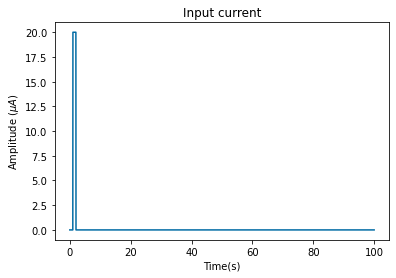

In [5]:
# A1.2a Set up and plot your input current

######################################
##   A1.2a solutions input current   ##
######################################
t = np.arange(0, 100, 0.01)
I_input = [0 if x < 1 or x > 2 else 20 for x in t]

plt.plot(t, I_input)
plt.title("Input current")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude $(\\mu A)$")
plt.show()

In [6]:
# A1.2b Insert the input current into your HH_model function

#######################################
##   A1.2b insert input in HH_model   ##
#######################################

T = 100
dt = 0.01

m, h, n, V, t, I_Na, I_K, I_L, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h, Tau_n, Tau_m, Tau_h = HH_model(T, I_input, dt)

### A1.3: Plot V(t) <a id="A1.3"/>
* [Go back to Q1.3](#Q1.3) 

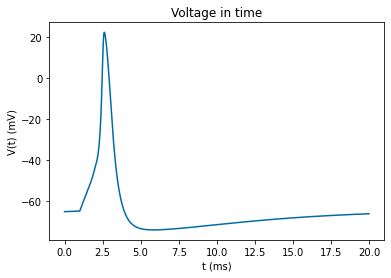

In [7]:
# A1.3a Enter your answer below

###########################
##   A1.3a solution plot  ##
###########################

plt.plot(t[:2000], V[:2000])
plt.xlabel('t (ms)')
plt.ylabel('V(t) (mV)')
plt.title('Voltage in time')
plt.show()

In [8]:
# A1.3b Enter your interpretation and conclusion below

#########################
##   A1.3b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
The plot clearly shows an action potential, whith values very close to the biological ones. We can clearly observe the three main stages of the neuron in an action potential:<br>
- Resting potential at ~ -65mV
- Depolarization with a threshold for the potential close to -55mV and a peak near 30mV
- Hyperpolarization with a refractory period a little lower than the resting potential

</span>

### A1.4: Plot the model parameters <a id="A1.4"/>
* [Go back to Q1.4](#Q1.4) 

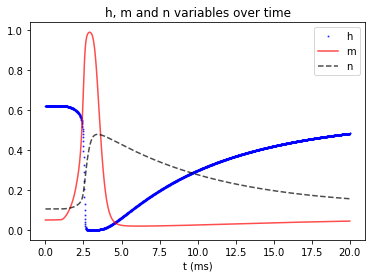

In [9]:
# A1.4a Plot your graph below

############################
##   A1.4a solution plot   ##
############################

plt.plot(t[:2000], h[:2000], 'b.', label='h', markersize=2, alpha=0.7)
plt.plot(t[:2000], m[:2000], 'r', label='m', markersize=2, alpha=0.7)
plt.plot(t[:2000], n[:2000], 'k--', label='n', markersize=2, alpha=0.7)
plt.xlabel('t (ms)')
plt.legend()
plt.title('h, m and n variables over time')
plt.show()

In [10]:
# A1.4b Enter your interpretation and conclusion answer below

#########################
##   A1.4b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.4b conclusion** 
    
Again, the graph presents a very clear representation of the behavior of the ion channels for Na+ and K+ during an action potential, where m and h have oposite values (which makes sense knowing that they have oposite functions regarding the gating of Na+ channels) and being responsible for the depolarization phase of the modeled potential, while the n variable (in charge of the opening of K+ channels) gets the model to the re-polarization and hyperpolarization.
    
</span>

### A1.5: Plot I_Na and I_K <a id="A1.5"/>
* [Go back to Q1.5](#Q1.5)

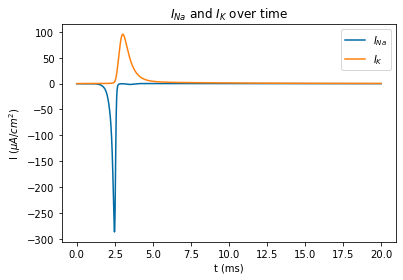

In [11]:
# A1.5a Plot your graph here

############################
##   A1.5a plot   ##
############################


plt.plot(t[:2000], I_Na[:2000], label='$I_{Na}$')
plt.plot(t[:2000], I_K[:2000], label='$I_K$')
plt.ylabel('I ($\\mu A/{cm^2})$')
plt.xlabel('t (ms)')
plt.title('$I_{Na}$ and $I_K$ over time')
plt.legend()
plt.show()

In [12]:
# A1.5b Enter your interpretation and conclusion

#########################
##   A1.5b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.5b conclusion** 
    
    
The plot demonstrates the behavior of Na+ and K+ ion currents. Knowing that the concentration of Na+ at rest is higher inside the cell than outside while it is the oposite for K+, and also taking into account the stages of the action potential described before, we can extrapolate from the graph that the depolarization (caused by the influx of Na+ into the cell) of the neuron reaches its peak at ~2.5ms, and the neuron goes back to its resting state at ~7.5ms after the hyperpolarization period (caused by outlux of K+ ions out of the cell). We can verify this by looking at the times and behavior shown in the Voltage plot in part 1.3a of the notebook.

    
</span>

### A1.6: Plot the conductances g_Na and g_K <a id="A1.6"/>
* [Go back to Q1.6](#Q1.6) 

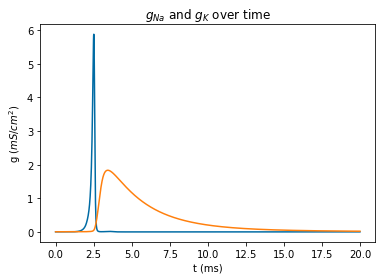

In [13]:
# A1.6a Enter your code and plot

###########################
##   A1.6a solution plot  ##
###########################


g_Na = [(40 * m[i]**3 * h[i]) for i in range(2000)] #see explanation before equation 2.5 in the theory
g_K = [(35 * n[i]**4) for i in range(2000)] 

plt.plot(t[:2000], g_Na[:2000], label ='$g_{Na}$')
plt.plot(t[:2000], g_K[:2000], label = '$g_K$')
plt.ylabel('g ($ mS/{cm^2})$')
plt.xlabel('t (ms)')
plt.title('$g_{Na}$ and $g_K$ over time')
plt.show()

In [14]:
# A1.6b Enter your interpretation and conclusion

#########################
##   A1.6b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.6b conclusion** 
    

The conductance of Na+ has a significantly higher value and it is more steep than for the K+, reaching its peak close to the peak of depolarization (just before the K+ gates open). The behavior of the conductance of K+ also makes sense knowing that it causes the repolarization of the neuron.

    
</span>

## Part 2: Package BRIAN

### Import <a id="P2_imports"/>

In [16]:
# The new libraries we need to add

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory


### A2.1 Step current response <a id="A2.1"/>
* [Go back to Q2.1](#Q2.1) 

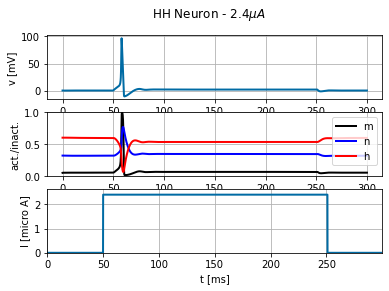

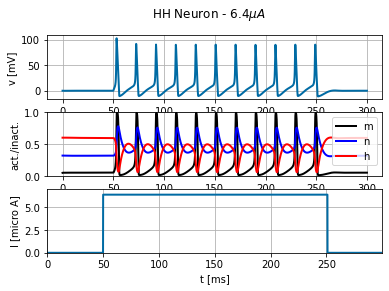

In [21]:
# A2.1a Enter your answer below

# Hint: The unit of the I_input current in the neurodynex3.hodgkin_huxley module is µA (coded b2.uA)

########################
##   Q2.1. solution   ##
########################

I_input = input_factory.get_step_current(50, 250, b2.ms, 2.4 * b2.uA, 50 * b2.uA)
state_monitor = HH.simulate_HH_neuron(I_input, 300 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron - 2.4$\\mu A $")

I_input = input_factory.get_step_current(50, 250, b2.ms, 6.4 * b2.uA, 50 * b2.uA)
state_monitor = HH.simulate_HH_neuron(I_input, 300 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron - 6.4$\\mu A $")

In [22]:
# Enter your conclusion and interpretation

##########################
##   Q2.1. conclusion   ##
##########################


# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.1 conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
The lowest step current amplitude to generate a spike is: 2.4uA
<br>
The lowest step current amplitude to generate repetitive firing is: 6.4uA

The neuron will start showing a spike from a current with amplitude of 2.4uA, which will then 
convert to repetitive firing at 6.4uA and continue with this behavior up until 50uA, increasing
its firing frequency directly proportional to the amplitude of the step current.


\end{tcolorbox}
    
</span>

### A2.2.1 Slow ramp current <a id="A2.2.1"/>
* [Go back to Q2.2.1](#Q2.2.1) 

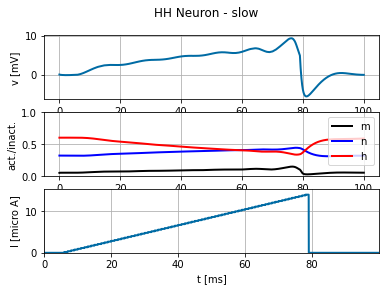

voltage_slow=0.007214642935639053


In [23]:
# Enter your code below

#########################
##   Q2.2.1a solution   ##
#########################

b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 78  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 14.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 100 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
HH.plot_data(state_monitor, title="HH Neuron - slow")
print(f"voltage_slow={voltage_slow}")

In [24]:
###########################
##   Q2.2.1a conclusion   ##
###########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.1a conclusion** 
    
\begin{tcolorbox}[colback=green!5]

The slow rising of the current prevents the neuron from reaching the threshold to get a spike. It can also be observed that the injection of current stopped at ~80ms.
<br><br>
The membrane voltage at the time when the current injection stops is 7mV. At this time, the neuron
shows a minimal rise in its voltage, but does not reach the threshold to be classified as a spike. We can see that this slow injection of current gives the neuron time to repolarize a bit and slow even more the rising before getting to the threshold.

\end{tcolorbox}
    
</span>

### A2.2.2 Fast ramp current <a id="A2.2.2"/>
* [Go back to Q2.2.2](#Q2.2.2) 

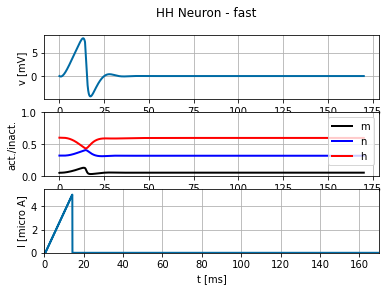

voltage_fast=0.007443206417119181


In [25]:
# Enter your code below

# Hint: change the unit time to 0.1ms to get a smooth ramp current. 

#######################################
##   Q2.2.2a and Q2.2.2b solutions   ##
#######################################

b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 142  # no spike. make it longer  -> voltage goes more than 10 times higher at 141
fast_ramp_current = input_factory.get_ramp_current(5, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 170 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
HH.plot_data(state_monitor, title="HH Neuron - fast")
print(f"voltage_fast={voltage_fast}")

##################################
##   Q2.2.2a and b conclusion   ##
##################################


# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.2a and A2.2.2b conclusions** 
    
\begin{tcolorbox}[colback=green!5]
    
The value for the voltage at the time the injection of current stopped is 7.4mV. <br>
We can observe here that presenting the neuron with a sharp injection of current for a period of time more than 4 times shorter than the one with the slow injection causes a spike much more easier. Because of the short amount of time, the neuron does not have time to repolarize and it will reach the threshold much more quickly than with a slow injection.


\end{tcolorbox}
    
</span>

### A2.2.3 Differences <a id="A2.2.3"/>
* [Go back to Q2.2.3](#Q2.2.3) 

In [24]:
# Enter your answer below

#########################
##   Q2.2.3 solution   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.3 conclusion** 
    
\begin{tcolorbox}[colback=green!5]

    
The slow ramp current presents a delayed activation of the neuron with a constant increase until 80ms, when it immediately stops. Here, the variable h has higher values compared to the one of the fast ramp current, which translates into less activation (or opening) of Na+ channels. We can also observe that there is a continuous slow (but steady) opening of K+ channels duting the whole current injection time, which helps to depolarize the neuron a bit and prevents it from reaching the spiking threshold earlier.
<br><br>
    
The fast ramp current increases very rapidly for ~15ms and gives a very fast activation to the neuron. Here the time is too short but we can still observe a rapid response from each variable, with the m variable having a slight increase (opening of Na+ channels), while the h decreases at a similar rate. The n variable suggests an increasing opening of the K+ channels the whole time.


\end{tcolorbox}
    
    
   
</span>

### A2.3 Rebound spike <a id="A2.3"/>
* [Go back to Q2.3](#Q2.3) 

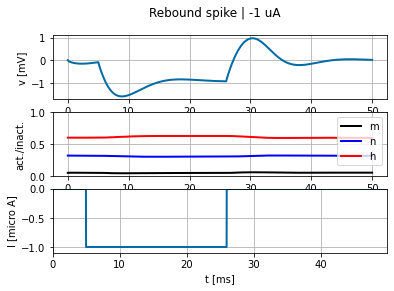

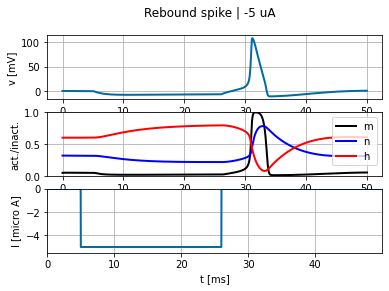

In [36]:
# Enter your answer below

#######################
##   Q2.3 solution   ##
#######################

rebound_current = input_factory.get_step_current(5, 25, b2.ms, -1*b2.uA)
state_monitor = HH.simulate_HH_neuron(rebound_current, 50 * b2.ms)
HH.plot_data(state_monitor, title=f"Rebound spike | -1 uA")


rebound_current = input_factory.get_step_current(5, 25, b2.ms, -5*b2.uA)
state_monitor = HH.simulate_HH_neuron(rebound_current, 50 * b2.ms)
HH.plot_data(state_monitor, title=f"Rebound spike | -5 uA")


<div class="alert alert-success">
<span style="color:black">

**A2.3 conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
The observed rebound spike is elicited by rebound repolarization that occurs after membrane hyperpolarization has happened and an arriving inhibitory signal is converted into cell scitation.
The variable n could be attributed as responsible for this as it is in charge of the opening of K+ gates that cause a decrease in the membrane potential.

\end{tcolorbox}
    
</span>